#### Author: Faolán Hamilton

Get the data from this link - https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

## Part 1 - 60%
Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month


## Part 2 - 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

-------------------------------------------------------------------------------

In [67]:
# Import the key modules to be used
from datetime import datetime as dt

from datetime import date as date

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import seaborn as sns

## Step 1 - Cleaning the data

##### To get the csv to open, I thought I had to download the data from the link, bring it into the assignment folder and delete the first several rows to clean the data - all I had to do was use the 'skiprows' function!

In [3]:
# Read in data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
df.head(2)

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\2444403082.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5


#### Looking at the question, I will only need temperature and windspeed so it is a good idea to remove unneccessary columns

In [4]:
# See all column names
headers = df.columns.tolist()
headers

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

In [5]:
# Remove the headers that are not relevant
drop_col_list = ['ind','rain','ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3','ind.4', 'wddir', 'ww', 'w','sun','vis','clht','clamt']
df.drop(columns=drop_col_list, inplace=True)
df.head(2)

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0


In [6]:
# I want to see the dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257154 entries, 0 to 257153
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    257154 non-null  object 
 1   temp    257154 non-null  float64
 2   wdsp    257154 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.9+ MB


### I want to clean up the dtype, starting with the date column

###### Datetime conversion source: https://www.geeksforgeeks.org/pandas/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [7]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M")
df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
257149   2025-11-30 20:00:00
257150   2025-11-30 21:00:00
257151   2025-11-30 22:00:00
257152   2025-11-30 23:00:00
257153   2025-12-01 00:00:00
Name: date, Length: 257154, dtype: datetime64[ns]

In [8]:
# Set the date column as the index to search by dates easily
df.set_index('date', inplace=True)
df.head(2)

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0
1996-07-31 08:00:00,11.5,0


In [9]:
# Set the Wind speed column to numeric value
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.head(2)
df['wdsp']

date
1996-04-10 14:00:00     0.0
1996-07-31 08:00:00     0.0
1996-07-31 09:00:00     0.0
1996-07-31 10:00:00     0.0
1996-07-31 11:00:00     0.0
                       ... 
2025-11-30 20:00:00    17.0
2025-11-30 21:00:00    14.0
2025-11-30 22:00:00    10.0
2025-11-30 23:00:00     6.0
2025-12-01 00:00:00     8.0
Name: wdsp, Length: 257154, dtype: float64

### The heading names are not entirely clear, I want to rename them

###### renaming columns (https://www.geeksforgeeks.org/python/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/)

###### renaming index (https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index)

In [10]:
# Improve the naming convention of the headings
df.columns = df.columns.str.replace('temp', 'Temperature (C)').str.replace('wdsp', 'Wind Speed (km)')
df.index.names = ['Date and Time']
df.head(2)

,Temperature (C),Wind Speed (km)
Date and Time,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0


##### I want to check if there are any null values

In [11]:
# Check for nulls
df.isnull().sum()

Temperature (C)     0
Wind Speed (km)    50
dtype: int64

###### check which rows are nulls in the DataFrame (https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe)

In [12]:
# See which rows have empty values to double check later
df[(df['Wind Speed (km)'].isnull())].index

DatetimeIndex(['1996-08-01 22:00:00', '1996-09-27 13:00:00',
               '1996-10-14 02:00:00', '1996-10-14 03:00:00',
               '1996-10-14 04:00:00', '1996-10-14 05:00:00',
               '1996-10-14 06:00:00', '1996-10-14 07:00:00',
               '1996-10-14 08:00:00', '1996-10-14 09:00:00',
               '1996-10-15 01:00:00', '1996-10-15 02:00:00',
               '1996-10-15 03:00:00', '1996-10-15 04:00:00',
               '1996-10-15 05:00:00', '1996-10-15 06:00:00',
               '1996-10-15 07:00:00', '1996-10-15 08:00:00',
               '1996-10-15 17:00:00', '1996-10-15 18:00:00',
               '1996-10-15 19:00:00', '1996-10-15 20:00:00',
               '1996-10-15 21:00:00', '1996-10-15 22:00:00',
               '1996-10-15 23:00:00', '1996-10-16 00:00:00',
               '1996-10-16 01:00:00', '1996-10-16 02:00:00',
               '1996-10-16 03:00:00', '1996-10-16 04:00:00',
               '1996-10-16 05:00:00', '1996-10-16 06:00:00',
               '1996-10-

In [13]:
# Check what the NaN value looks like
df.loc['1996-08-01 22:00:00']

Temperature (C)    10.8
Wind Speed (km)     NaN
Name: 1996-08-01 22:00:00, dtype: float64

#### There are 50 null values in Wind Speed, I will need to clean this data up - my chosen method will be to replace the null values with 0 to be consistent with the existing data structure

In [14]:
# Fill NaN value with '0.0'
df.fillna(value='0.0', inplace=True)
df.head(2)

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\339308327.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value='0.0', inplace=True)


,Temperature (C),Wind Speed (km)
Date and Time,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0


In [15]:
# Check to see if that worked
df.loc['1996-08-01 22:00:00']

Temperature (C)    10.8
Wind Speed (km)     0.0
Name: 1996-08-01 22:00:00, dtype: object

In [16]:
# Checking again for nulls
df.isnull().sum()

Temperature (C)    0
Wind Speed (km)    0
dtype: int64

------------------------------------------------------------------------

## Part 1 of the assignment

###### Pandas resampling documentation - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


### Plotting Temperature

###### setting yticklabels on sns - https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot

### I was trying to colour the plots based on value and found the best way to do it was through scatterplots not lineplots

#### This source was invaluable - https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python

#### Reversing the colourmap order to show the cooler temperatures as blue
##### Source - https://stackoverflow.com/questions/3279560/reverse-colormap-in-matplotlib

#### Getting the colours
##### Source - https://www.practicalpythonfordatascience.com/ap_seaborn_palette

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\166754772.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['-10°C', '-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C'])


[Text(0, -10.0, '-10°C'),
 Text(0, -5.0, '-5°C'),
 Text(0, 0.0, '0°C'),
 Text(0, 5.0, '5°C'),
 Text(0, 10.0, '10°C'),
 Text(0, 15.0, '15°C'),
 Text(0, 20.0, '20°C'),
 Text(0, 25.0, '25°C'),
 Text(0, 30.0, ''),
 Text(0, 35.0, '')]

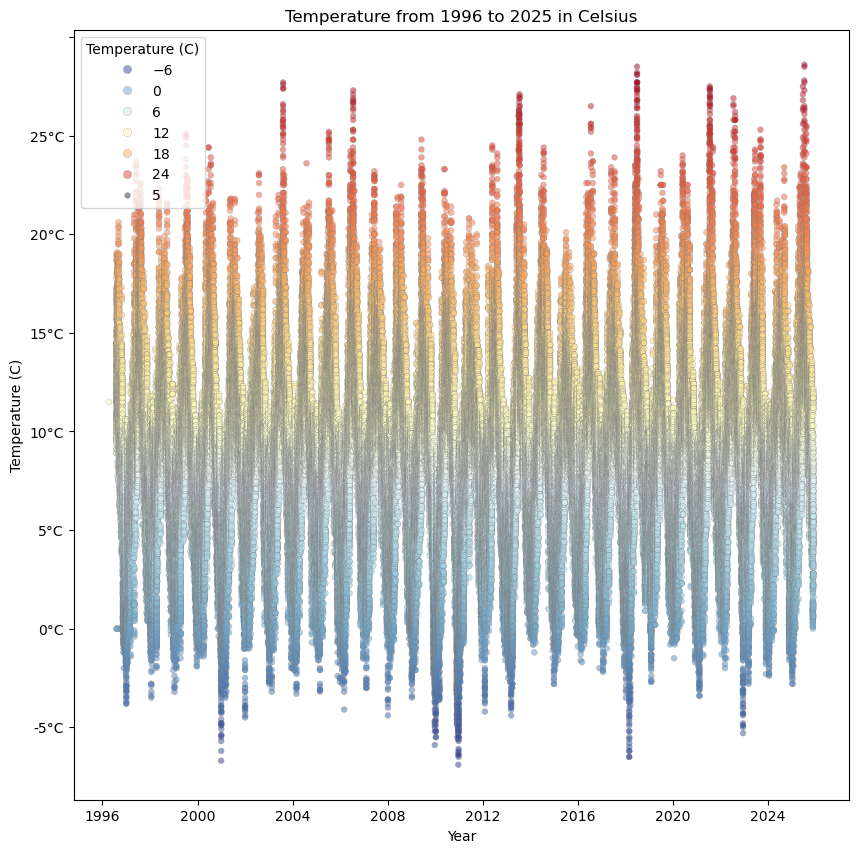

In [89]:
# Plotting the Temperature
plt.figure(figsize=(10,10))
y = df['Temperature (C)']
plot = sns.scatterplot(x = df['Temperature (C)'].index, y = y, hue = y, palette = "RdYlBu_r", edgecolor = 'grey', alpha = 0.5, size = 5)
patch = mpatches.Patch(color='red', label='Warm weather')
plot.set_title("Temperature from 1996 to 2025 in Celsius")
plot.set_xlabel('Year')
plot.set_yticklabels(['-10°C', '-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C'])

In [18]:
# Setting the mean temperature of each day 
meandaytemp = df['Temperature (C)'].resample("D").mean()
meandaytemp

Date and Time
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Freq: D, Name: Temperature (C), Length: 10828, dtype: float64

#### The data starts on the 1996-04-10, but doesn't become consistent until 1996-07-31. I will drop the na values between this time

In [19]:
# Drop NA value
meandaytemp.dropna(inplace=True)
meandaytemp

Date and Time
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Name: Temperature (C), Length: 10717, dtype: float64

### I got stuck 

#### Copilot answer - https://copilot.microsoft.com/shares/rEzKeLL3To9kok7KRz8C2

#### Sources from Copilot palette not cmap -https://stackoverflow.com/questions/37902459/seaborn-color-palette-as-matplotlib-colormap 

#### hue not c - https://stackoverflow.com/questions/67637829/seaborn-scatterplot-does-not-color-correctly-hue


C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\1067592220.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['-10°C', '-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C'])


[Text(0, -10.0, '-10°C'),
 Text(0, -5.0, '-5°C'),
 Text(0, 0.0, '0°C'),
 Text(0, 5.0, '5°C'),
 Text(0, 10.0, '10°C'),
 Text(0, 15.0, '15°C'),
 Text(0, 20.0, '20°C'),
 Text(0, 25.0, '25°C')]

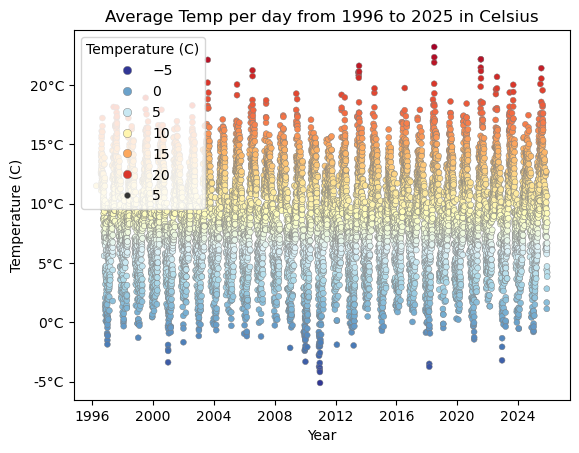

In [87]:
# Plotting the mean day Temperature
x = meandaytemp.index
y = meandaytemp
plot = sns.scatterplot(x = x, y = y,  hue = y,  palette = "RdYlBu_r", edgecolor = 'grey', size = 5);
plot.set_title('Average Temp per day from 1996 to 2025 in Celsius')
plot.set_xlabel('Year')
plot.set_yticklabels(['-10°C', '-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C'])

In [21]:
# Getting the mean temperature per month 
mean_month_temp = df['Temperature (C)'].resample("ME").mean()
mean_month_temp

Date and Time
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.153889
2025-12-31     8.400000
Freq: ME, Name: Temperature (C), Length: 357, dtype: float64

In [22]:
# Drop na values from the mean temperature per month 
mean_month_temp.dropna(inplace=True)
mean_month_temp

Date and Time
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
                ...    
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.153889
2025-12-31     8.400000
Name: Temperature (C), Length: 355, dtype: float64

##### I did not use these sources in the end but they were great to research

###### plotting the axis based on the index - https://stackoverflow.com/questions/22356881/using-a-pandas-dataframe-index-as-values-for-x-axis-in-matplotlib-plot

###### plotting the axis based on the index - https://duckduckgo.com/?q=matplotlib+madates+formatter+plot+axis+based+on+index&atb=v491-1&kbg=-1&ia=web

ValueError: Date and Time
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
                ...    
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.153889
2025-12-31     8.400000
Name: Temperature (C), Length: 355, dtype: float64 is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

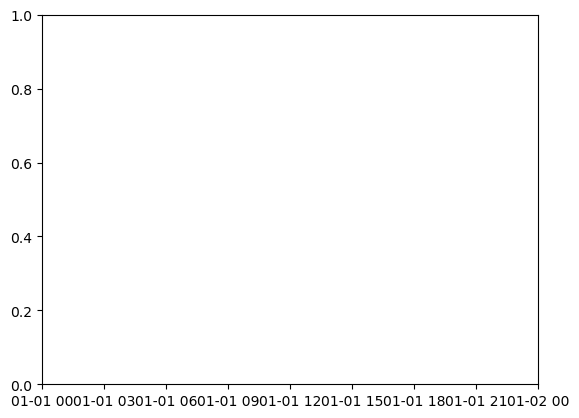

In [82]:
# plotting the mean month temperature
y = mean_month_temp
x = mean_month_temp.index
plot = sns.lineplot(x=x,y=y,c=y, cmap = 'RdYlBu')
plt.colorbar()
plot.set_title("Average Temperature per month from 1996 to 2025 in Celsius")
plot.set_xlabel('Year')
plot.set_yticklabels(['-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C','30°C', '35°C', '40°C'])

--------------------------------------------------------------------
## Part 2 of the assignment

The Windspeed

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\1215116396.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])


[Text(0, -10.0, '-10km/hr'),
 Text(0, 0.0, '0km/hr'),
 Text(0, 10.0, '10km/hr'),
 Text(0, 20.0, '20km/hr'),
 Text(0, 30.0, '30km/hr'),
 Text(0, 40.0, '40km/hr'),
 Text(0, 50.0, '50km/hr'),
 Text(0, 60.0, '60km/hr')]

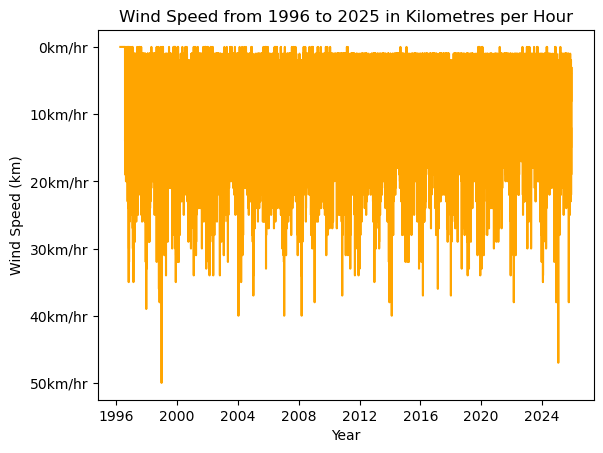

In [24]:
# Plotting the windspeed
plot = sns.lineplot(df['Wind Speed (km)'], color="orange")
plot.set_title("Wind Speed from 1996 to 2025 in Kilometres per Hour")
plot.set_xlabel('Year')
plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])

The Rolling Windspeed

In [25]:
# Using the end of the dataset to plot the 30th of November
twentyfour_hrs = df['Wind Speed (km)'].tail(25)

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\1266558362.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['00','03', '06', '09','12','15','18', '21', '00'])


[Text(20422.0, 0, '00'),
 Text(20422.125, 0, '03'),
 Text(20422.25, 0, '06'),
 Text(20422.375, 0, '09'),
 Text(20422.5, 0, '12'),
 Text(20422.625, 0, '15'),
 Text(20422.75, 0, '18'),
 Text(20422.875, 0, '21'),
 Text(20423.0, 0, '00')]

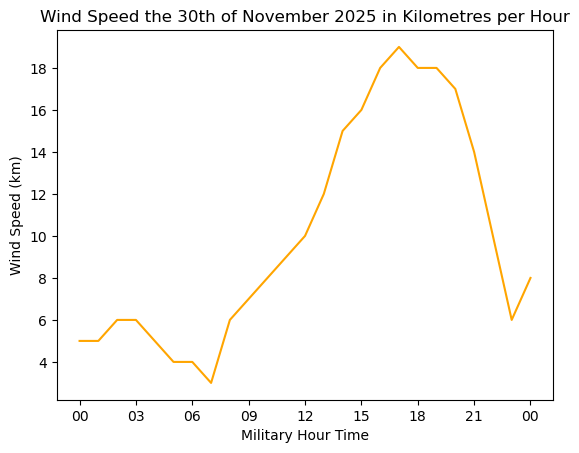

In [26]:
# Plotting the rolling windspeed data
plot = sns.lineplot(twentyfour_hrs, color="orange")
plot.set_title("Wind Speed the 30th of November 2025 in Kilometres per Hour")
plot.set_xlabel('Military Hour Time')
plot.set_xticklabels(['00','03', '06', '09','12','15','18', '21', '00'])

The max windspeed for each day

##### When I tried to ge the max windspeed it threw an error as the dtype was wrong, even though I converted to numeric earlier. I will try again now as I have since renamed the column

In [27]:
# Set the Wind speed column to numeric value
df['Wind Speed (km)'] = pd.to_numeric(df['Wind Speed (km)'], errors='coerce')
df.head(2)
df['Wind Speed (km)']

Date and Time
1996-04-10 14:00:00     0.0
1996-07-31 08:00:00     0.0
1996-07-31 09:00:00     0.0
1996-07-31 10:00:00     0.0
1996-07-31 11:00:00     0.0
                       ... 
2025-11-30 20:00:00    17.0
2025-11-30 21:00:00    14.0
2025-11-30 22:00:00    10.0
2025-11-30 23:00:00     6.0
2025-12-01 00:00:00     8.0
Name: Wind Speed (km), Length: 257154, dtype: float64

In [28]:
# Get the max windspeed
max_windspeed = df['Wind Speed (km)'].resample("D").max()

In [29]:
# Drop NA values
max_windspeed.dropna(inplace=True)
max_windspeed

Date and Time
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
              ... 
2025-11-27    22.0
2025-11-28    19.0
2025-11-29    12.0
2025-11-30    19.0
2025-12-01     8.0
Name: Wind Speed (km), Length: 10717, dtype: float64

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\3924139868.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])


[Text(0, -10.0, '-10km/hr'),
 Text(0, 0.0, '0km/hr'),
 Text(0, 10.0, '10km/hr'),
 Text(0, 20.0, '20km/hr'),
 Text(0, 30.0, '30km/hr'),
 Text(0, 40.0, '40km/hr'),
 Text(0, 50.0, '50km/hr'),
 Text(0, 60.0, '60km/hr')]

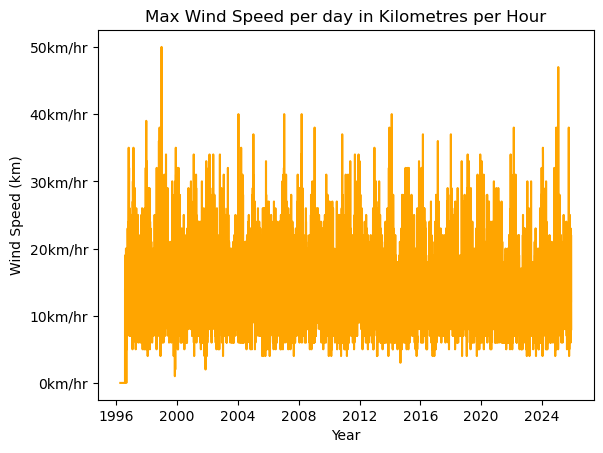

In [30]:
# Plotting the max windspeed data
plot = sns.lineplot(max_windspeed, color="orange")
plot.set_title("Max Wind Speed per day in Kilometres per Hour")
plot.set_xlabel('Year')
plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])

### The monthly mean of the daily max windspeeds

##### Calculate the Daily Max windspeed first (done above) then the monthly mean of these 

In [31]:
# Monthly mean of the daily max windspeed
monthlymean_dailymax = max_windspeed.resample("ME").mean()
monthlymean_dailymax

Date and Time
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
                ...    
2025-08-31    13.258065
2025-09-30    15.000000
2025-10-31    15.354839
2025-11-30    15.400000
2025-12-31     8.000000
Freq: ME, Name: Wind Speed (km), Length: 357, dtype: float64

In [32]:
# Drop NA values
monthlymean_dailymax.dropna(inplace=True)
monthlymean_dailymax

Date and Time
1996-04-30     0.000000
1996-07-31     0.000000
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
                ...    
2025-08-31    13.258065
2025-09-30    15.000000
2025-10-31    15.354839
2025-11-30    15.400000
2025-12-31     8.000000
Name: Wind Speed (km), Length: 355, dtype: float64

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_28388\2170143352.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])


[Text(0, -5.0, '-10km/hr'),
 Text(0, 0.0, '0km/hr'),
 Text(0, 5.0, '10km/hr'),
 Text(0, 10.0, '20km/hr'),
 Text(0, 15.0, '30km/hr'),
 Text(0, 20.0, '40km/hr'),
 Text(0, 25.0, '50km/hr')]

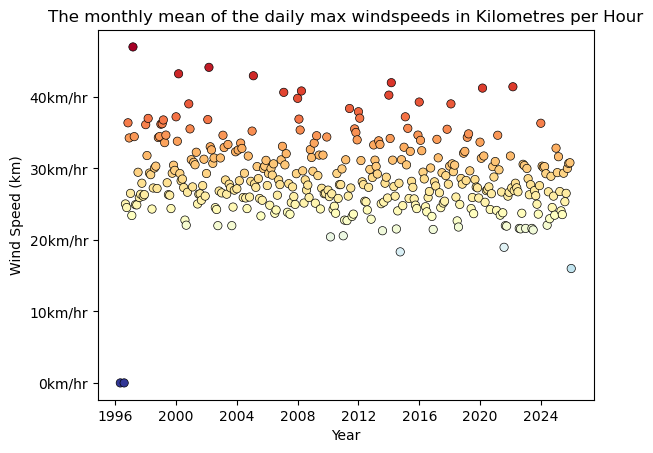

In [33]:
# Plotting the monthly mean daily max data
y = monthlymean_dailymax
plot = sns.scatterplot(x = monthlymean_dailymax.index, y = y, c = y, cmap = "RdYlBu_r", edgecolor = 'black')
plot.set_title("The monthly mean of the daily max windspeeds in Kilometres per Hour")
plot.set_xlabel('Year')
plot.set_yticklabels(['-10km/hr','0km/hr', '10km/hr', '20km/hr','30km/hr','40km/hr','50km/hr', '60km/hr'])